In [1]:
# Importação das Bibliotecas 
import pandas as pd
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# Importação dos dados a serem utilizados para a criação do modelo de ML
# skiprows = 0.01 = 1% of the lines
data_origin = pd.read_csv('3_Training_Model_Data.csv', encoding='latin-1', 
                                                       skiprows=lambda i: i>0 and random.random() > 0.10) #nrows= 15_000_000)
# ADICIONANDO CABEÇALHO AO ARQUIVO
data_origin.columns=['patients', 'neuro_1', 'cardi_1', 'respi_1', 'coagu_1', 'hepat_1', 'renal_1', 'icc_1', 'ecog_1', 'SOFA_total_1', 'amib_total_1',
                          'neuro_2', 'cardi_2', 'respi_2', 'coagu_2', 'hepat_2', 'renal_2', 'icc_2', 'ecog_2', 'SOFA_total_2', 'amib_total_2','decisao']
#Removendo a coluna patients
data = data_origin.drop('patients', axis=1)

#TRANSFORMANDO O DATASET PARA MELHOR TRABALHAR
data = data.astype('int16')

data

,neuro_1,cardi_1,respi_1,coagu_1,hepat_1,renal_1,icc_1,ecog_1,SOFA_total_1,amib_total_1,...,cardi_2,respi_2,coagu_2,hepat_2,renal_2,icc_2,ecog_2,SOFA_total_2,amib_total_2,decisao
0,2,3,1,0,2,3,0,0,8,1,...,0,1,3,2,2,3,0,6,4,1
1,2,3,1,0,2,3,0,0,8,1,...,3,1,2,3,4,3,0,9,5,1
2,2,3,1,0,2,3,0,0,8,1,...,3,2,0,1,3,0,0,7,1,2
3,2,3,1,0,2,3,0,0,8,1,...,1,1,2,0,2,0,0,4,1,2
4,2,3,1,0,2,3,0,0,8,1,...,3,0,3,0,1,0,0,7,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009126,1,2,2,1,0,2,3,0,6,4,...,4,0,0,4,1,0,0,8,1,2
7009127,1,2,2,1,0,2,3,0,6,4,...,4,3,3,3,0,0,0,16,4,2
7009128,1,2,2,1,0,2,3,0,6,4,...,4,4,1,2,2,3,0,15,7,1
7009129,1,2,2,1,0,2,3,0,6,4,...,0,3,2,1,3,3,0,9,5,1


In [3]:
#Se tiver um bom resultado, pode ser exportado essa base de dados.

#data_origin.to_csv("D:\Mestrado\MasterMedicalDecisionSupport\Arquivos_Tot\Dataset_Trained_26-02.csv")

In [4]:
# Quantidade de registros no dataset com cada decisão do AMIB/ABRAMED
data['decisao'].value_counts()

2    3368883
1    3362603
0     277645
Name: decisao, dtype: int64

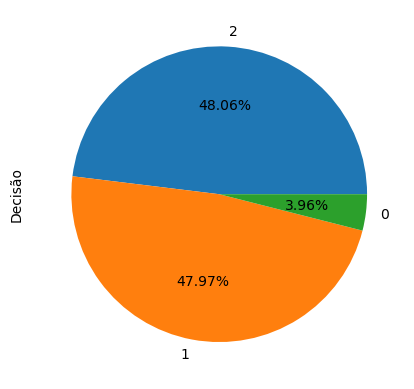

In [5]:
# GRAFICO PARA MOSTRAR A DIVISÃO DOS REGISTROS.
%matplotlib inline
import matplotlib.pyplot as plt

data['decisao'].value_counts().plot(kind='pie', autopct='%0.2f%%', label = 'Decisão');
#plt.savefig('segundo_teste.png', format='png')

<AxesSubplot:>

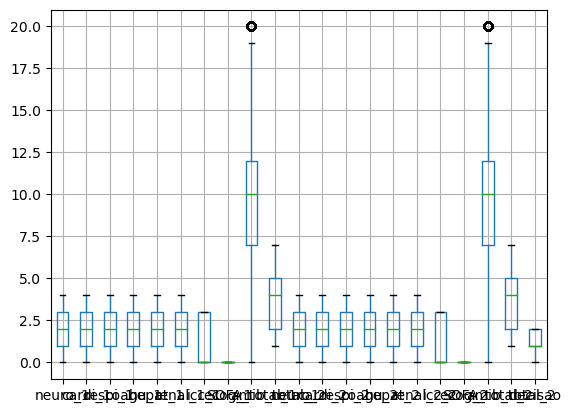

In [6]:
data.boxplot()

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criando o ambiente do gráfico 
sns.set_style("white")
plt.figure(figsize=(10, 10))

# Gráfico de Dispersão
g = sns.scatterplot(x="decisao", y="Taxa %", 
                    data=data)
plt.show()

ValueError: Could not interpret value `Taxa %` for parameter `y`

<Figure size 1000x1000 with 0 Axes>

<AxesSubplot:>

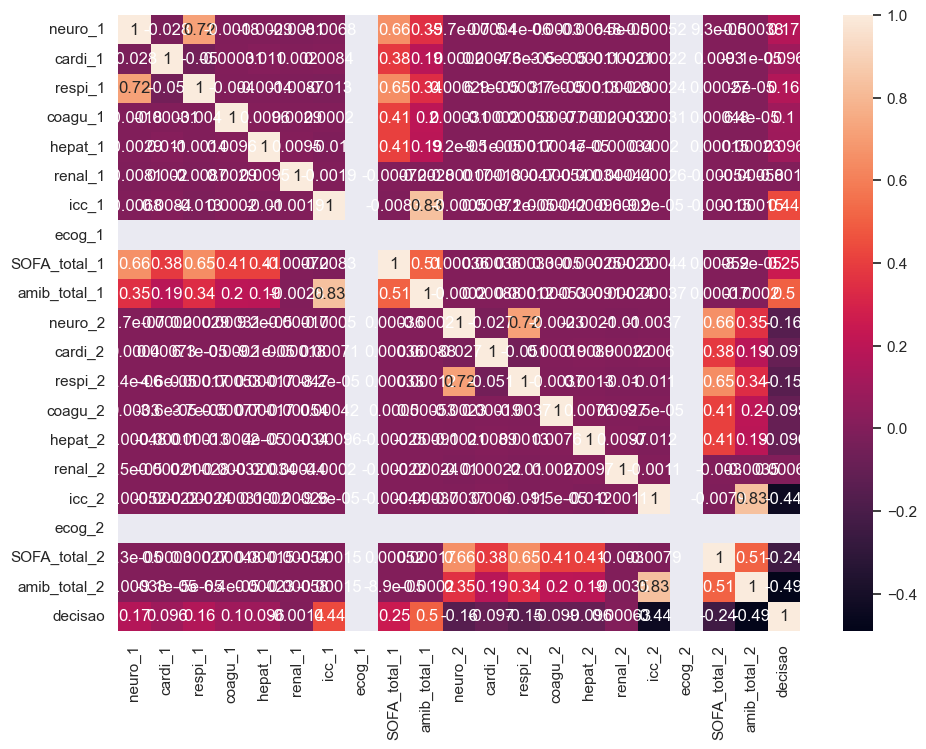

In [8]:
# Visualiza a Correlação
import seaborn as sns
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(data.corr(), annot=True)#, annot_kws={"size": 10})
#plt.savefig('segundo_teste_Correlacao.png')

In [ ]:
### 3° Pré-Processamento dos dados

# Convertendo variáveis string em numéricas com o "LabelEncoder"


#for variaveis in ['neuro_1', 'cardi_1', 'respi_1', 'coagu_1', 'hepat_1', 'renal_1', 'icc_1', 'ecog_1', 'SOFA_total_1', 'amib_total_1','neuro_2', 'cardi_2', 'respi_2', 'coagu_2', 'hepat_2', 'renal_2', 'icc_2', 'ecog_2', 'SOFA_total_2', 'amib_total_2']:
    #data[variaveis] = LabelEncoder().fit_transform(data[variaveis])

#data.head()

In [10]:
# Selecionando as variáveis a serem utilizadas na Previsão e colocando em 'X'
# somente removendo as que não fazem parte do grupo
X = data.drop("decisao", axis=1)
# Colocando a variável target (label, variavel a ser predita....) no objeto 'Y'
Y = data['decisao'].values.tolist()


In [11]:
# Dividindo os dados em Treino e Teste (30% para teste)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

print('O dataset de treino possui {} registros e o de teste {} registros.'
       .format(X_train.shape[0], X_test.shape[0]))

O dataset de treino possui 4906391 registros e o de teste 2102740 registros.


In [12]:
# Criando a Máquina Preditiva - Instanciando o Algoritmo de ML (Chamando o algoritmo a ser usado)
clf_RF = RandomForestClassifier(n_estimators=100, random_state=42)

In [13]:
# Treinando o Algoritmo com os dados de treino
clf_RF = clf_RF.fit(X_train, Y_train)

In [14]:
# 5° Avaliando a Acurácia do Modelo de Machine Learning

# Validando a Maquina Preditiva - Verificando o nível de Acurácia da Máquina Preditiva
accuracy = clf_RF.score(X_test, Y_test)
print('Accuracy: ' + str(accuracy))


Accuracy: 0.9999814527711463


In [15]:
# Importância das Variáveis
#features = data.columns.difference(['decisao'])
features = data

features_importance = zip(clf_RF.feature_importances_, features)
for importance, feature in sorted(features_importance, reverse=True):
    print("%s: %f%%" % (feature, importance*100))

amib_total_2: 19.693976%
amib_total_1: 17.473748%
icc_1: 16.924660%
icc_2: 14.173183%
SOFA_total_1: 11.728398%
SOFA_total_2: 11.229979%
respi_2: 1.199491%
neuro_2: 1.146029%
neuro_1: 1.124581%
respi_1: 1.043467%
hepat_1: 0.656212%
coagu_1: 0.649627%
hepat_2: 0.648813%
coagu_2: 0.640932%
cardi_2: 0.640079%
cardi_1: 0.616604%
renal_1: 0.205868%
renal_2: 0.204353%
ecog_2: 0.000000%
ecog_1: 0.000000%


In [ ]:
# CRIANDO AS MÉTRICAS COM A SELEÇÃO DE DADOS QUE O RANDOM FOREST SEPAROU.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

y_pred = clf_RF.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='macro')
recall = recall_score(Y_test, y_pred, average='macro')
f1 = f1_score(Y_test, y_pred, average='macro')
auc_roc = roc_auc_score(Y_test, clf_RF.predict_proba(X_test), multi_class='ovr')
cm = confusion_matrix(Y_test, y_pred)

print(f'Acurácia-RF: {accuracy:.2f}')
print(f'Precisão-RF: {precision:.2f}')
print(f'Recall-RF: {recall:.2f}')
print(f'F1-Score-RF: {f1:.2f}')
print(f'AUC-ROC-RF: {auc_roc:.2f}')
print(f'Matriz de Confusão-RF:\n{cm}')

In [ ]:
#TESTANDO COM DADOS DE OUTRO ARQUIVO.

In [ ]:
## Importação de outro arquivo.
Data_validation = pd.read_csv('Data_Validation_20_Patient.csv',encoding='latin-1')

# ADICIONANDO CABEÇALHO AO ARQUIVO
Data_validation.columns=['patients', 'neuro_1', 'cardi_1', 'respi_1', 'coagu_1', 'hepat_1', 'renal_1', 'icc_1', 'ecog_1', 'SOFA_total_1', 'amib_total_1',
                          'neuro_2', 'cardi_2', 'respi_2', 'coagu_2', 'hepat_2', 'renal_2', 'icc_2', 'ecog_2', 'SOFA_total_2', 'amib_total_2','decisao']
# Colocando a variável target em 'Y' para comparação
Y_validation = Data_validation['decisao'].values.tolist()

#Removendo a coluna patients e decisao
Data_prepared = Data_validation.drop(['patients','decisao'], axis=1)


In [ ]:
#CRIANDO TESTE NA MÃO

'''Data_prepared = ([
    [0,4,0,3,3,3,0,0,10,2,0,4,0,3,3,3,0,0,10,2],
    [0,4,0,3,3,3,0,0,10,2,0,2,0,2,3,2,3,0,7,4],
    [0,4,0,3,3,3,0,0,10,2,0,3,2,1,1,0,0,0,7,1],
    [0,4,0,3,3,3,0,0,10,2,4,4,4,4,1,1,3,0,17,7],
    [0,4,0,3,3,3,0,0,10,2,2,3,0,3,2,1,0,0,10,2],
    [0,4,0,3,3,3,0,0,10,2,4,1,4,3,0,3,0,0,12,3],
    [0,4,0,3,3,3,0,0,10,2,3,0,4,1,3,2,0,0,11,2],
    [0,4,0,3,3,3,0,0,10,2,0,0,1,3,2,2,3,0,6,4],
    [0,4,0,3,3,3,0,0,10,2,0,4,2,2,2,0,0,0,10,2],
    [0,4,0,3,3,3,0,0,10,2,1,0,2,2,2,0,0,0,7,1],
    [0,4,0,3,3,3,0,0,10,2,3,2,3,3,0,0,0,0,11,2]
    ])
'''
# Criando um DataFrame com os rótulos de características corretos
#df = pd.DataFrame(test, columns=['neuro_1', 'cardi_1', 'respi_1', 'coagu_1', 'hepat_1', 'renal_1', 'icc_1', 'ecog_1', 'SOFA_total_1', 'amib_total_1','neuro_2', 'cardi_2', 'respi_2', 'coagu_2', 'hepat_2', 'renal_2', 'icc_2', 'ecog_2', 'SOFA_total_2', 'amib_total_2'])


#Y_validation = [0,1,2,1,0,1,1,1,0,2,1]

#0_vs_0,0,4,0,3,3,3,0,0,10,2,0,4,0,3,3,3,0,0,10,2,0
#0_vs_1,0,4,0,3,3,3,0,0,10,2,0,2,0,2,3,2,3,0,7,4,1
#0_vs_2,0,4,0,3,3,3,0,0,10,2,0,3,2,1,1,0,0,0,7,1,2
#0_vs_3,0,4,0,3,3,3,0,0,10,2,4,4,4,4,1,1,3,0,17,7,1
#0_vs_4,0,4,0,3,3,3,0,0,10,2,2,3,0,3,2,1,0,0,10,2,0
#0_vs_5,0,4,0,3,3,3,0,0,10,2,4,1,4,3,0,3,0,0,12,3,1
#0_vs_6,0,4,0,3,3,3,0,0,10,2,3,0,4,1,3,2,0,0,11,2,1
#0_vs_7,0,4,0,3,3,3,0,0,10,2,0,0,1,3,2,2,3,0,6,4,1
#0_vs_8,0,4,0,3,3,3,0,0,10,2,0,4,2,2,2,0,0,0,10,2,0
#0_vs_9,0,4,0,3,3,3,0,0,10,2,1,0,2,2,2,0,0,0,7,1,2
#0_vs_10,0,4,0,3,3,3,0,0,10,2,3,2,3,3,0,0,0,0,11,2,1

In [ ]:
# Utilizando a Máquina Preditiva - Fazendo Previsões com novos dados 

New_Predictions = clf_RF.predict(Data_prepared)

print(Y_validation," - Resposta Gerada", )
print(New_Predictions, " - Resposta Modelo")

# Método para saber a diferença em porcentagem. 
count = 0
diff = []

for i in range(len(Y_validation)):
    if Y_validation[i] != New_Predictions[i]:
        count += 1
        diff.append((i, Y_validation[i], New_Predictions[i]))
        

print("Número de elementos diferentes: ", count)
print("Porcentagem de diferença: ", (count/len(Y_validation))*100, "%")
print("Valores dos elementos diferentes:")

for i in range(len(diff)):
    print("Posição", diff[i][0], "- Arquivo:", diff[i][1], "Previsão:", diff[i][2])

In [ ]:
# CRIANDO AS MÉTRICAS COM A SELEÇÃO DE DADOS IMPORTADAS DO ARQUIVO.

'''from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

y_pred = clf_RF.predict(Data_prepared)

accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='macro')
recall = recall_score(Y_test, y_pred, average='macro')
f1 = f1_score(Y_test, y_pred, average='macro')
auc_roc = roc_auc_score(Y_test, clf_RF.predict_proba(Data_prepared), multi_class='ovr')
cm = confusion_matrix(Y_test, y_pred)

print(f'Acurácia: {accuracy:.2f}')
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'Matriz de Confusão:\n{cm}')

'''

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Criando o modelo
model = LogisticRegression()

# Usando validação cruzada com 5 folds
scores = cross_val_score(model, X_train, Y_train, cv=15)

# Imprimindo a acurácia média e o desvio padrão
print(f"Acurácia média: {scores.mean():.2f}")
print(f"Desvio padrão: {scores.std():.2f}")

In [ ]:
#pip install graphviz

In [ ]:
#Módulos para gerar um gráfico de um modelo

from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import display, SVG

In [ ]:
'''
Exibe uma árvore a partir de um modelo e sua acurácia
'''
def show_tree(model, X, y):
  graph_data = export_graphviz(
    model, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names, 
    filled=True, 
    rounded=True)
  
  y_pred = model.predict(X)
  print('Acc: %.4f' %accuracy_score(y, y_pred))

  graph = Source(graph_data)
  return SVG(graph.pipe(format='svg'))

In [ ]:
models = clf_RF.estimators_

In [ ]:

'''
Exibe um modelo qualquer
'''
show_tree(models[50], X_test, y_test)